## O. Importy a načítanie datasetu


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix,  classification_report


In [ ]:
#Import datasetu
dataset = pd.read_csv('Churn_Modelling.csv', index_col='RowNumber')
dataset.head()
data_train2 = dataset.drop(['CustomerId','Surname'],axis=1)

## 1. Príprava dát

In [ ]:
# rozdelenie datasetu na dáta a hodnoty True/False (0,1), ktoré odkazujú na to 
# či zákazník opustil banku alebo nie.
X_col = dataset.columns.tolist()[2:12]
y_col = dataset.columns.tolist()[-1:]
print('Dáta', X_col)
print('True/False', y_col)

Dáta ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
True/False ['Exited']


In [ ]:
# vytvorenie nummpy array z týchto stĺpcov
X = dataset[X_col].values 
y = dataset[y_col].values
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

Ako môžeme vidieť tak dáta obsahujú aj kategorické premenné, ktoré treba nahradiť.

In [ ]:
encoder = LabelEncoder()
X[:,1] = encoder.fit_transform(X[:,1]) # zmena krajiny na hodnoty vhodné pre analýzu (0-France,1-Germany,2-France)
print('Krajina: ')
print(X[:,1])
X[:,2] = encoder.fit_transform(X[:,2]) # zmena pohlavia na hodnoty vhodné pre analýzu (0-Female, 1-Male)
print('Pohlavie: ')
print(X[:,2])

Krajina: 
[0 2 0 ... 0 1 0]
Pohlavie: 
[0 0 0 ... 0 1 0]


In [ ]:
pipeline = Pipeline(
    [('Categorizer', ColumnTransformer(
         [
          ("Gender", OneHotEncoder(categories='auto', drop='first'), [2]),
           
          ("Geography", OneHotEncoder(categories='auto', drop='first'), [1])
         ], remainder='passthrough', n_jobs=1)),
     # Standard Scaler for the classifier
    ('Normalizer', StandardScaler())
    ])

In [ ]:
X = pipeline.fit_transform(X)

In [ ]:
# Rozdelenie datasetu na testovacie a trénovacie dáta v pomere 30:70
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0) 

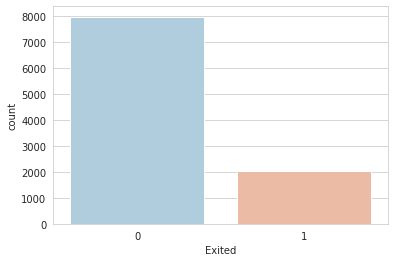

In [ ]:
data2 = dataset.drop(['CustomerId','Surname'],axis=1)
sns.set_style('whitegrid')
sns.countplot(x='Exited',data=data2,palette='RdBu_r')
# je vidieť, že dáta nie sú veľmi vyvážené.

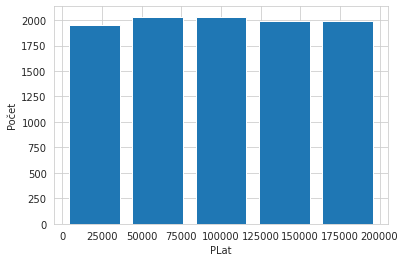

In [ ]:
plt.hist(data2.EstimatedSalary, bins=5
         , rwidth=0.8)
plt.xlabel('PLat')
plt.ylabel('Počet')
plt.show()

##2. Vytvorenie NS

In [ ]:
classifier = Sequential()

In [ ]:
# Vstupná vrstva a prvá skrytá vrstva
classifier.add(Dense(6, activation = 'relu',input_shape = (X_train.shape[1], )))
# pridanie nasledujúcej skrytej vrstvy
classifier.add(Dense(6, activation = 'relu')) 
# pridatnie výstupnej vrstvy
classifier.add(Dense(1, activation = 'sigmoid')) 
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
trenovanie = classifier.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1, verbose=2)

Epoch 1/100
197/197 - 1s - loss: 0.5403 - accuracy: 0.7957 - val_loss: 0.4939 - val_accuracy: 0.8014
Epoch 2/100
197/197 - 0s - loss: 0.4775 - accuracy: 0.7973 - val_loss: 0.4623 - val_accuracy: 0.8014
Epoch 3/100
197/197 - 0s - loss: 0.4548 - accuracy: 0.7970 - val_loss: 0.4515 - val_accuracy: 0.7986
Epoch 4/100
197/197 - 0s - loss: 0.4439 - accuracy: 0.7987 - val_loss: 0.4444 - val_accuracy: 0.7943
Epoch 5/100
197/197 - 0s - loss: 0.4370 - accuracy: 0.8017 - val_loss: 0.4379 - val_accuracy: 0.8043
Epoch 6/100
197/197 - 0s - loss: 0.4317 - accuracy: 0.8086 - val_loss: 0.4335 - val_accuracy: 0.8071
Epoch 7/100
197/197 - 0s - loss: 0.4274 - accuracy: 0.8124 - val_loss: 0.4290 - val_accuracy: 0.8086
Epoch 8/100
197/197 - 0s - loss: 0.4233 - accuracy: 0.8167 - val_loss: 0.4246 - val_accuracy: 0.8129
Epoch 9/100
197/197 - 0s - loss: 0.4203 - accuracy: 0.8213 - val_loss: 0.4205 - val_accuracy: 0.8200
Epoch 10/100
197/197 - 0s - loss: 0.4171 - accuracy: 0.8243 - val_loss: 0.4160 - val_accura

##3. Vizualizácia

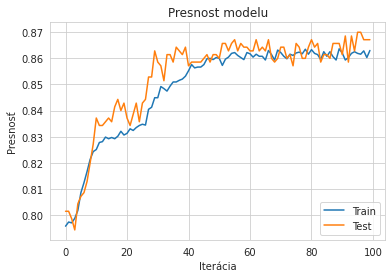

In [ ]:
plt.plot(trenovanie.history['accuracy'])
plt.plot(trenovanie.history['val_accuracy'])
plt.ylabel('Presnosť')
plt.xlabel('Iterácia')
plt.title('Presnost modelu')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

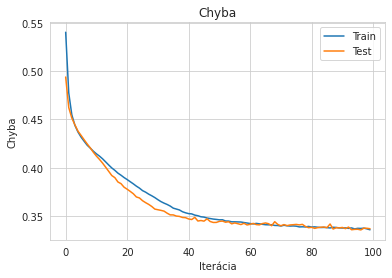

In [ ]:
plt.plot(trenovanie.history['loss']) 
plt.plot(trenovanie.history['val_loss']) 
plt.ylabel('Chyba') 
plt.xlabel('Iterácia')
plt.title('Chyba') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred[:5])
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:5])

[[0.20034844]
 [0.31392953]
 [0.17002425]
 [0.03406203]
 [0.0362978 ]]
[[0]
 [0]
 [0]
 [0]
 [0]]


In [ ]:
cm = confusion_matrix(y_test, y_pred)

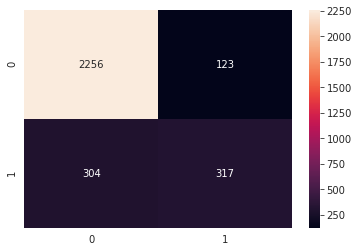

In [ ]:
sns.heatmap(cm,annot=True,fmt='g')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2379
           1       0.72      0.51      0.60       621

    accuracy                           0.86      3000
   macro avg       0.80      0.73      0.76      3000
weighted avg       0.85      0.86      0.85      3000



## 4. Zlepšenie výsledkov


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2379
           1       0.58      0.23      0.33       621

    accuracy                           0.81      3000
   macro avg       0.71      0.59      0.61      3000
weighted avg       0.78      0.81      0.77      3000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_new, y_new = smote.fit_resample(X, np.ravel(y))
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, stratify=y_new)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1593
           1       0.72      0.70      0.71      1593

    accuracy                           0.72      3186
   macro avg       0.72      0.72      0.72      3186
weighted avg       0.72      0.72      0.72      3186



In [ ]:
trenovanie = classifier.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.1, verbose=2)

Epoch 1/100
359/359 - 1s - loss: 0.4608 - accuracy: 0.7792 - val_loss: 0.4342 - val_accuracy: 0.8006
Epoch 2/100
359/359 - 0s - loss: 0.4511 - accuracy: 0.7841 - val_loss: 0.4296 - val_accuracy: 0.8046
Epoch 3/100
359/359 - 1s - loss: 0.4485 - accuracy: 0.7861 - val_loss: 0.4327 - val_accuracy: 0.8022
Epoch 4/100
359/359 - 0s - loss: 0.4478 - accuracy: 0.7876 - val_loss: 0.4302 - val_accuracy: 0.8077
Epoch 5/100
359/359 - 1s - loss: 0.4467 - accuracy: 0.7886 - val_loss: 0.4264 - val_accuracy: 0.8085
Epoch 6/100
359/359 - 0s - loss: 0.4453 - accuracy: 0.7884 - val_loss: 0.4287 - val_accuracy: 0.8093
Epoch 7/100
359/359 - 0s - loss: 0.4446 - accuracy: 0.7879 - val_loss: 0.4303 - val_accuracy: 0.8014
Epoch 8/100
359/359 - 1s - loss: 0.4439 - accuracy: 0.7872 - val_loss: 0.4288 - val_accuracy: 0.8006
Epoch 9/100
359/359 - 1s - loss: 0.4434 - accuracy: 0.7914 - val_loss: 0.4277 - val_accuracy: 0.8100
Epoch 10/100
359/359 - 1s - loss: 0.4429 - accuracy: 0.7899 - val_loss: 0.4261 - val_accura

In [ ]:
y_pred = classifier.predict(x_test)
print(y_pred[:5])
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:5])
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0.43861252]
 [0.64832664]
 [0.323543  ]
 [0.75950694]
 [0.9944241 ]]
[[0]
 [1]
 [0]
 [1]
 [1]]
[[1271  322]
 [ 321 1272]]


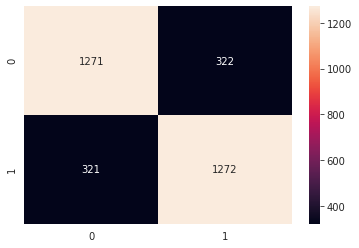

In [ ]:
sns.heatmap(cm,annot=True,fmt='g')

In [ ]:
print (((cm[0][0]+cm[1][1])*100)/(len(y_test)), '% dát bolo klasifikovaných správne')

79.8179535467671 % dát bolo klasifikovaných správne


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1593
           1       0.80      0.80      0.80      1593

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186

